<a href="https://colab.research.google.com/github/kittidet2541/credit_risk_analysis/blob/main/credit_analysis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# project : Credit risk analysis

# 1. Understanding the Problem & Data Preparation


In [109]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

df = pd.read_csv('/content/drive/MyDrive/credit_risk_dataset.csv')

#2. EDA and Clean data

In [110]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [111]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [112]:
df.shape  # ขนาดของข้อมูล (จำนวนแถวและจำนวนคอลัมน์)
df.columns  # ชื่อคอลัมน์
df.info()  # ตรวจสอบชนิดของข้อมูลและข้อมูลที่สูญหาย
df.describe()  # ค่าสถิติเบื้องต้น เช่น ค่าเฉลี่ย ค่าเบี่ยงเบนมาตรฐาน


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [113]:
df.isnull().sum()  # นับจำนวนค่าว่างในแต่ละคอลัมน์


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


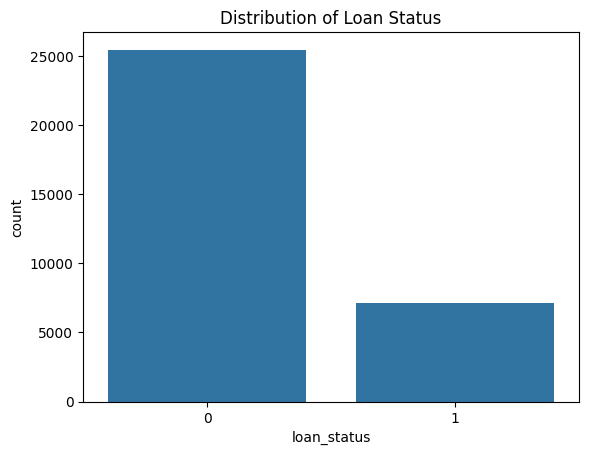

In [114]:
# ดูการกระจายของ loan_status
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

In [115]:
#ค่าเฉลี่ย กับ มัธยฐาน ใกล้เคียงกัน กราฟไม่เบ้ fill ด้วย mean
mean_value_loan_int_rate = df['loan_int_rate'].mean()
mean_value_person_emp_length = df['person_emp_length'].mean()

# ใช้ fillna() เพื่อแทนค่าที่เป็น NaN ด้วยค่าเฉลี่ย
df['loan_int_rate'] = df['loan_int_rate'].fillna(mean_value)
df['person_emp_length'] = df['person_emp_length'].fillna(mean_value)

In [116]:
df.isnull().sum()  # นับจำนวนค่าว่างในแต่ละคอลัมน์


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [117]:
# drop error
df['person_age'].drop(df[df['person_age'] > 80].index, inplace=True)

#3.prepocess & visualization

In [118]:
# แปลงข้อมูลหมวดหมู่เป็นตัวเลขโดยใช้ Label Encoding
le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['loan_grade'] = le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])




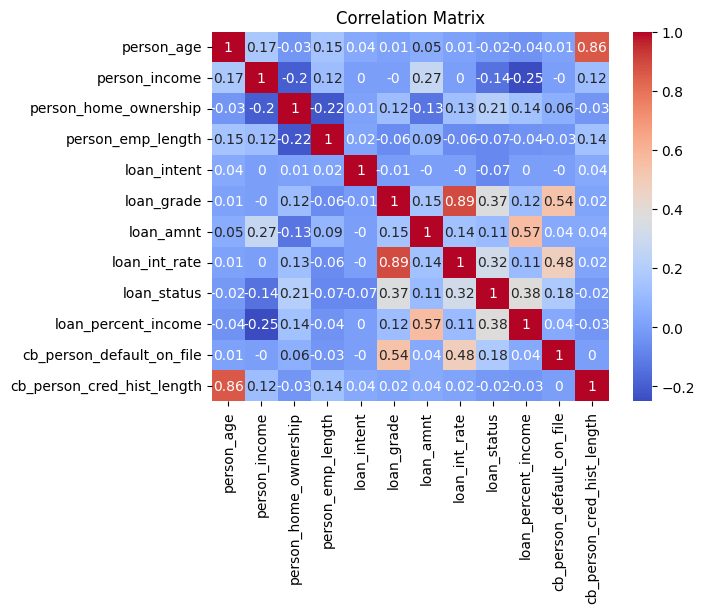

In [119]:
# สร้าง heatmap ความสัมพันธ์ระหว่างตัวแปรอีกครั้ง
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [120]:
# 1. สร้าง DataFrame ของความสัมพันธ์
correlation_matrix = df.corr().round(2)

# แสดง DataFrame ของความสัมพันธ์
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.00,0.17,-0.03,0.15,0.04,0.01,0.05,0.01,-0.02,-0.04,0.01,0.86
person_income,0.17,1.00,-0.20,0.12,0.00,-0.00,0.27,0.00,-0.14,-0.25,-0.00,0.12
person_home_ownership,-0.03,-0.20,1.00,-0.22,0.01,0.12,-0.13,0.13,0.21,0.14,0.06,-0.03
person_emp_length,0.15,0.12,-0.22,1.00,0.02,-0.06,0.09,-0.06,-0.07,-0.04,-0.03,0.14
loan_intent,0.04,0.00,0.01,0.02,1.00,-0.01,-0.00,-0.00,-0.07,0.00,-0.00,0.04
loan_grade,0.01,-0.00,0.12,-0.06,-0.01,1.00,0.15,0.89,0.37,0.12,0.54,0.02
loan_amnt,0.05,0.27,-0.13,0.09,-0.00,0.15,1.00,0.14,0.11,0.57,0.04,0.04
loan_int_rate,0.01,0.00,0.13,-0.06,-0.00,0.89,0.14,1.00,0.32,0.11,0.48,0.02
loan_status,-0.02,-0.14,0.21,-0.07,-0.07,0.37,0.11,0.32,1.00,0.38,0.18,-0.02
loan_percent_income,-0.04,-0.25,0.14,-0.04,0.00,0.12,0.57,0.11,0.38,1.00,0.04,-0.03


In [121]:
import pandas as pd

# สมมติว่า df คือ DataFrame ของคุณ
# df = pd.read_csv('your_data.csv')  # โหลดข้อมูล (ถ้ายังไม่ได้โหลด)

# 1. สร้างฟีเจอร์ใหม่ที่มีความสัมพันธ์กับ loan_status

# 1.1 อัตราส่วนของ loan amount ต่อ person income
df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']

# 1.2 สร้างการแบ่งกลุ่มอายุ (bins) เพื่อดูความแตกต่าง
bins = [20, 30, 40, 50, 60, 70, 80]  # กำหนดช่วงอายุ
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels)

# 1.3 การสร้างฟีเจอร์ใหม่จาก loan_grade และ loan_int_rate
df['grade_interest_interaction'] = df['loan_grade'] * df['loan_int_rate']

# 1.4 สร้างฟีเจอร์ที่แสดงประวัติเครดิตและการผิดนัด
df['credit_default'] = df['cb_person_default_on_file'] * df['cb_person_cred_hist_length']

# 1.5 สร้างฟีเจอร์การทำงาน (employment) เพื่อประเมินความมั่นคงทางการเงิน
df['is_long_term_employment'] = df['person_emp_length'].apply(lambda x: 1 if x >= 5 else 0)

# 2. สร้าง DataFrame สำหรับ X (ฟีเจอร์) และ y (สถานะการชำระหนี้)
features = [
    "loan_grade",
    "loan_int_rate",
    "loan_amnt",
    "loan_to_income_ratio",
    "credit_default",
    "is_long_term_employment",
    "person_income",
]

X = df[features]

y = df['loan_status']  # ตัวแปรเป้าหมาย

# แสดง DataFrame ใหม่ที่สร้างฟีเจอร์เพิ่ม
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income_ratio,age_group,grade_interest_interaction,credit_default,is_long_term_employment
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3,0.593220,20-30,48.06,3,1
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2,0.104167,20-30,11.14,0,1
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3,0.572917,20-30,25.74,0,0
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2,0.534351,20-30,30.46,0,0
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4,0.643382,20-30,28.54,4,1


## 4. Feature Engineering

ต่อไปจะทำ Feature engineering จะใช้ 3 วิธีเทียบความเเม่นยำของโฒเดล

In [122]:
# Feature Engineering Cor check feature to target
x = ['person_income','person_home_ownership', 'loan_grade', 'loan_int_rate', 'loan_percent_income']
X =df[x]
y = df['loan_status']

In [123]:
def feature_engineering_feature_to_target(df):
  x = ['person_income',
       'person_home_ownership',
       'loan_grade',
       'loan_int_rate',
       'loan_percent_income'
]
  X =df[x]
  y = df['loan_status']
  return X,y


def feature_engineering_add_new_feature(df):
    features = ["loan_grade",
    "loan_int_rate",
    "loan_amnt",
    "loan_to_income_ratio",
    "credit_default",
    "is_long_term_employment",
    "person_income"]

    X = df[features]
    y = df['loan_status']
    return X,y




#5.Model Building

feature to feature old data

In [124]:
# feature_engineering_feature_to_target(df)

In [134]:
# แบ่งข้อมูลเป็น training และ testing set
x = ['person_income',
       'person_home_ownership',
       'loan_grade',
       'loan_int_rate',
       'loan_percent_income'
]
X =df[x]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ทำการสเกลข้อมูลด้วย StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# สร้างและฝึกสอนโมเดล Logistic Regression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# ทำนายผลลัพธ์จากชุดทดสอบ
y_pred = log_reg.predict(X_test)


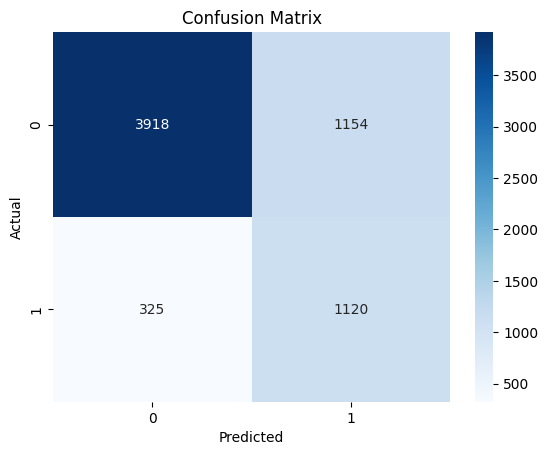

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      5072
           1       0.49      0.78      0.60      1445

    accuracy                           0.77      6517
   macro avg       0.71      0.77      0.72      6517
weighted avg       0.83      0.77      0.79      6517

ROC AUC Score: 0.8373506625697226


In [135]:
# แสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# แสดงรายงานการจัดประเภท (Classification Report)
print(classification_report(y_test, y_pred))

# คำนวณ ROC AUC Score
roc_score = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_score}")

In [137]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# แยกข้อมูลออกเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล XGBoost พร้อมปรับค่า scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = xgb.XGBClassifier( random_state=42)

# เทรนโมเดล
model.fit(X_train, y_train)

# ทำนายค่าจากข้อมูลทดสอบ
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

# ประเมินผลลัพธ์
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs)}")


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5072
           1       0.87      0.68      0.76      1445

    accuracy                           0.91      6517
   macro avg       0.89      0.83      0.85      6517
weighted avg       0.90      0.91      0.90      6517

ROC AUC Score: 0.9309470953903922


In [128]:
# แบ่งข้อมูลเป็น training และ testing set
features = ["loan_grade",
    "loan_int_rate",
    "loan_amnt",
    "loan_to_income_ratio",
    "credit_default",
    "is_long_term_employment",
    "person_income"]

X = df[features]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ทำการสเกลข้อมูลด้วย StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# สร้างและฝึกสอนโมเดล Logistic Regression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# ทำนายผลลัพธ์จากชุดทดสอบ
y_pred = log_reg.predict(X_test)


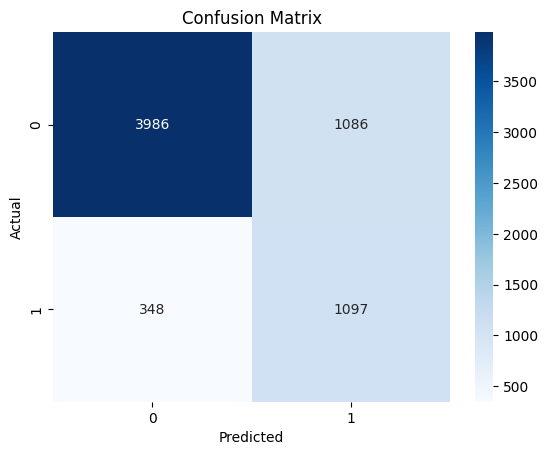

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      5072
           1       0.50      0.76      0.60      1445

    accuracy                           0.78      6517
   macro avg       0.71      0.77      0.73      6517
weighted avg       0.83      0.78      0.79      6517

ROC AUC Score: 0.8419984745614706


In [129]:
# แสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# แสดงรายงานการจัดประเภท (Classification Report)
print(classification_report(y_test, y_pred))

# คำนวณ ROC AUC Score
roc_score = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_score}")

In [130]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# แยกข้อมูลออกเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล XGBoost พร้อมปรับค่า scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# เทรนโมเดล
model.fit(X_train, y_train)

# ทำนายค่าจากข้อมูลทดสอบ
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

# ประเมินผลลัพธ์
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs)}")


              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5072
           1       0.65      0.79      0.71      1445

    accuracy                           0.86      6517
   macro avg       0.79      0.83      0.81      6517
weighted avg       0.87      0.86      0.86      6517

ROC AUC Score: 0.9052637180312837
